## Multiple Linear Regression

Now you know how to build a model with one X (independent variable) and Y (dependent variable). But what if you have three feature variables, or may be 10 or 100? By using multiple linear regression, you can build models between a dependent variable and many independent variables.

Dataset - advertising.csv

Independent variables - TV Ad Expenses, Radio Ad Expenses, Newspaper Ad Expenses

Dependent variable - Sales

In [1]:
#1 Import necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2 Import the dataset (advertising.csv) and look at the top five rows
df = pd.read_csv('tvmarketing.csv')

In [4]:
#3 Look at the bottom five rows
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [4]:
#4 Check the shape of the DataFrame (rows, columns)
df.shape

(200, 2)

In [5]:
#5 Look at the data types of the columns
df['TV'].dtype

dtype('float64')

In [6]:
#6 Look at the summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


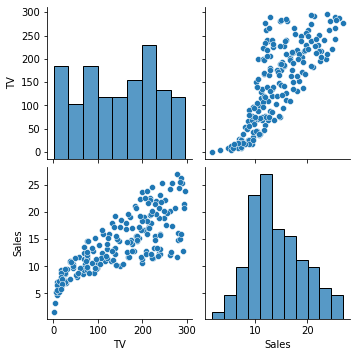

In [7]:
#7 Do a pairplot of the variables
sns.pairplot(df)
plt.show()


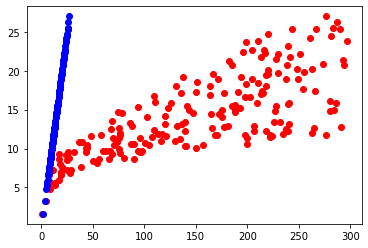

In [31]:
#8 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
plt.scatter(df.iloc[:,0], df.iloc[:,-1], color = 'red')
plt.scatter(df.iloc[:,1], df.iloc[:,-1], color = 'blue')

plt.show()

In [9]:
#9 Prepare  X (independent variables) and y (dependent variable)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [10]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [11]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Residual plot - plot y_pred in x axis and errors in y axis
y_pred = lr.predict(X_train)
error = y_pred - y_train
sns.residplot(y_pred, error)
plt.show()



/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 12 features, but LinearRegression is expecting 1 features as input.

X_train shape: (381, 12)
X_pred shape: (381, 12)


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

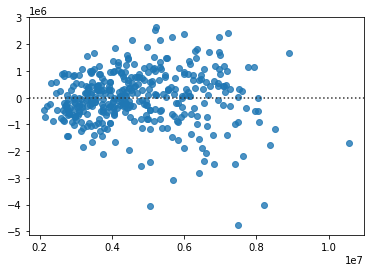

In [13]:
#13 Predic on the test set
y_pred = lr.predict(X_test)
error = y_pred - y_test
sns.residplot(y_pred, error)
plt.show()


TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

In [14]:
#14 Print Mean Squared Error and R Squared Value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

15.454057520040413

## Backward elimination

In [15]:
#15 Build the optimal model using backward elimination








## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [16]:
#16Import the dataset (Housing.csv) and look at the top five rows
df2 = pd.read_csv('Housing.csv')

In [17]:
#17 Look at the bottom five rows
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
#18 Check the shape of the DataFrame (rows, columns)
df2.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [19]:
#19 Look at the data types of the columns
df2['price'].dtype

dtype('int64')

In [20]:
#20 Look at the summary statistics
df2.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [21]:
#21 Prepare  X (independent variables) and y (dependent variable)
X = df2.iloc[:,1:]
X
y = df2.iloc[:,0]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [22]:
#22 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:,4] = le.fit_transform(X.iloc[:,4])
X.iloc[:,5] = le.fit_transform(X.iloc[:,5])
X.iloc[:,6] = le.fit_transform(X.iloc[:,6])
X.iloc[:,7] = le.fit_transform(X.iloc[:,7])
X.iloc[:,8] = le.fit_transform(X.iloc[:,8])
X.iloc[:,10] = le.fit_transform(X.iloc[:,10])
X.iloc[:,11] = le.fit_transform(X.iloc[:,11])

In [23]:
#23 Avoiding the Dummy Variable Trap
X = X.get_dummies(X,colums=['furnishingstatus'], drop_first=True)

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [24]:
#24 Look at the top 5 rows after preprocessing
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [25]:
#25 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [26]:
#26 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## Backward elimination

In [27]:
#27 #15 Build the optimal model using backward elimination
import statsmodels.formula.api as smf






ModuleNotFoundError: No module named 'statsmodels'